**Data Science and AI for Energy Systems** 

Karlsruhe Institute of Technology

Institute of Automation and Applied Informatics

Summer Term 2024

---

# Exercise I: Introduction to Data Science and AI for Energy Systems - Solution

**Imports**

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

## PROBLEM I.2 (PROGRAMMING) – INTRODUCTION TO DATA ANALYSIS FOR FREQUENCY DYNAMICS

A central element of this lecture is the analysis of empirical data. In this exercise, we introduce some analysis methods to an empirical time series of frequency measurement data. In especially we focus on some important indicators of frequency stability, namely the largest frequency deviation (Nadir), the aggregated deviation (integral), the mean-square-displacement (MSD) and the largest change of frequency (RoCoF = rate of change of frequency). <br>
Given a time series of frequency deviation data (i.e. a time series of frequency data minus the reference frequency), we calculate the indicators for certain time intervals $$I_i = \{t_i,t_{i+1}+\tau,\ldots,t_i+\tau \gamma\},$$ where $\tau$ is the time resolution, $\gamma$ represents the size of the interval, and $t_i$ is the starting point of the $i\text{th}$ interval.<br>
In our example, we consider hourly time steps with $\gamma = 3600$, a time resolution $\tau = 1\text{s}$, and $t_i$ denotes the start of the $i\text{th}$ hour of the data.
Given the frequency time series $f(t)$, the indicators are then given as 
\begin{align*}
    \text{Nadir}(t_i) &= f(\text{argmax}_{t\in I_i}|f(t)|),\\
    \text{Integral}(t_i) &= \tau \sum_{t\in I_i}f(t),\\
    \text{MSD}(t_i) &= \tau \sum_{t\in I_i}f^2(t), \text{ and}\\
    \text{RoCoF}(t_i) &= \frac{df}{dt}\left(\text{argmax}_{t \in W_i}\left|\frac{df}{dt}\right|\right), 
\end{align*}
where $W_i = [t_i - T, t_i + T]$ represents a time window around $t_i$ for a fixed window size $T$.

#### (a) Load the file *frequency_CE_ex1.csv* which contains a time series of frequency deviation data from the Continental European power grid and plot the entire time series as well as a histogram to get an impression of the distribution of the time series.

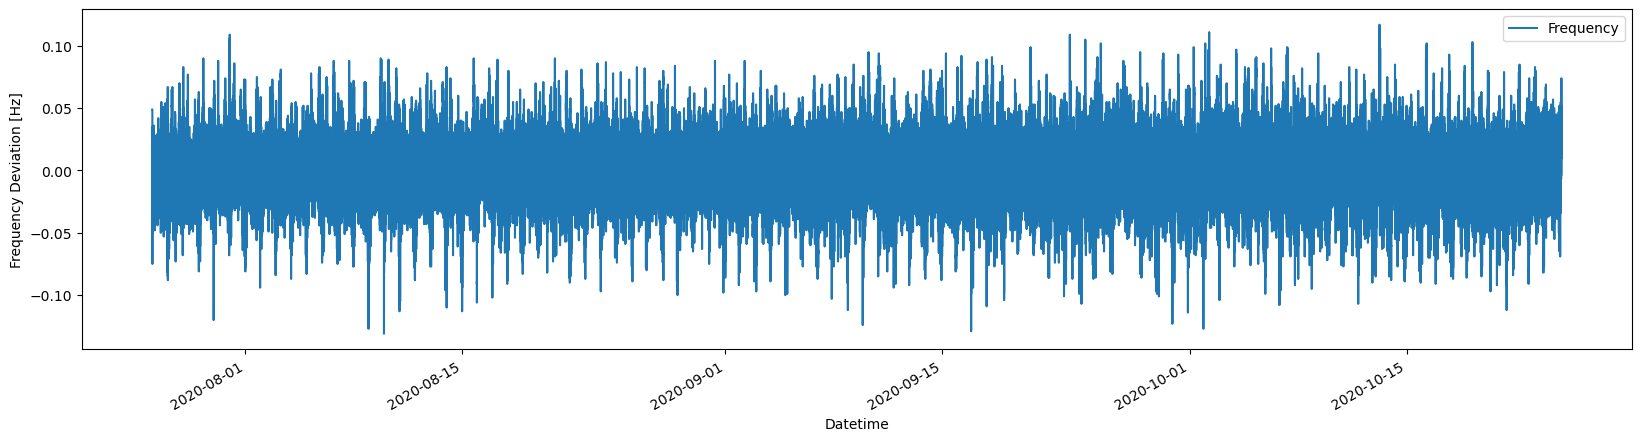

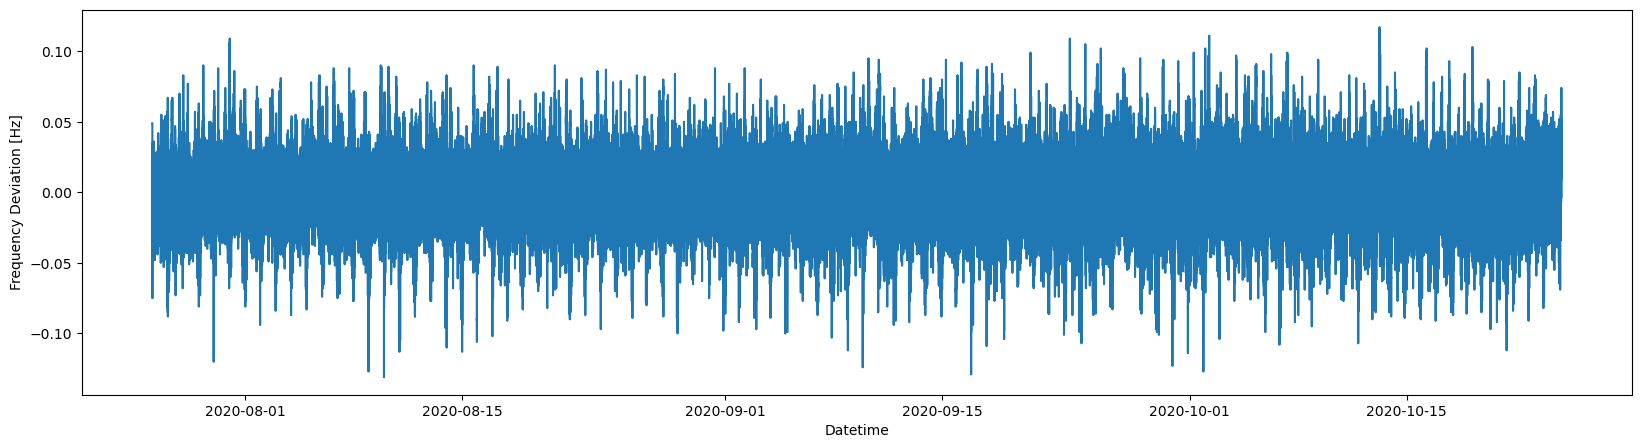

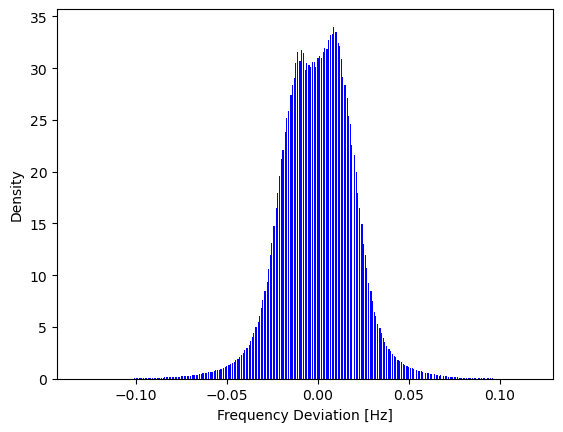

Text(0.5, 0, 'Frequency Deviation [Hz]')

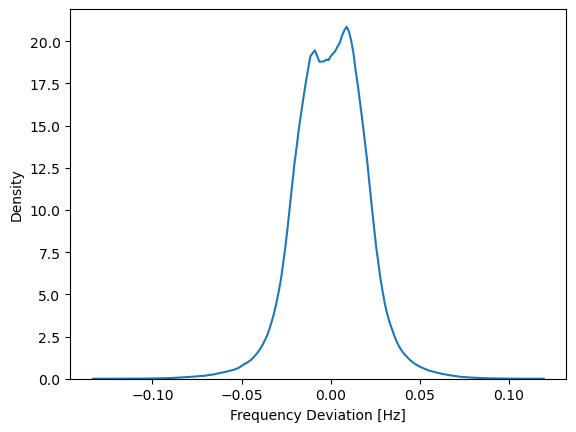

In [2]:
'''We assume that the file is located in a subfolder called 'data': '''
df = pd.read_csv('data/frequency_CE_ex1.csv', index_col='Datetime', parse_dates=True) 
'''Continue with plotting the data and the frequency distribution: '''
df.plot(x_compat=True, figsize=(20,5))
plt.xlabel('Datetime')
plt.ylabel('Frequency Deviation [Hz]')
plt.legend()
plt.show() 
'''
We use x_compat=True for better date formatting and faster calculation.

An alternative way to plot the data is to use the matplotlib library directly:
'''
plt.figure(figsize=(20,5))
plt.xlabel('Datetime')
plt.ylabel('Frequency Deviation [Hz]')
plt.plot(df.index,df.values)
plt.show()

'''We can also plot the frequency distribution: '''
plt.hist(df.values, bins=400, color='blue', density=True)
plt.xlabel('Frequency Deviation [Hz]')
plt.ylabel('Density')
plt.show()

'''An alternative for plotting the density is a Gaussian kernel density estimation:'''
sns.kdeplot(df.values, color='blue', legend = False)
plt.xlabel('Frequency Deviation [Hz]')

#### Note that the frequency deviation is defined as the difference between the original measured frequency and the reference frequency (in the Continental Europe power grid the value of the reference frequency is 50Hz)

#### (b) Compute and plot the daily profile of the time series. The daily profile is defined as the average over the entire data set for each time step of each day, i.e. over all the days in the data set, and plot the result. Can you observe a pattern? What could be a possible reason for a pattern?

<Figure size 640x480 with 0 Axes>

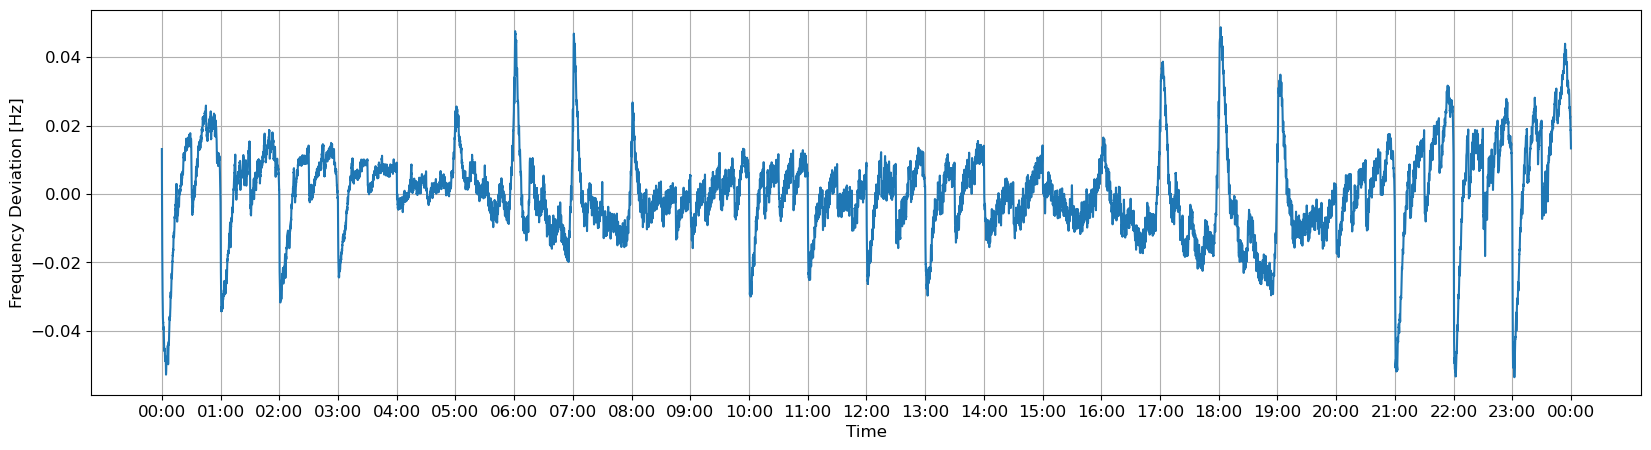

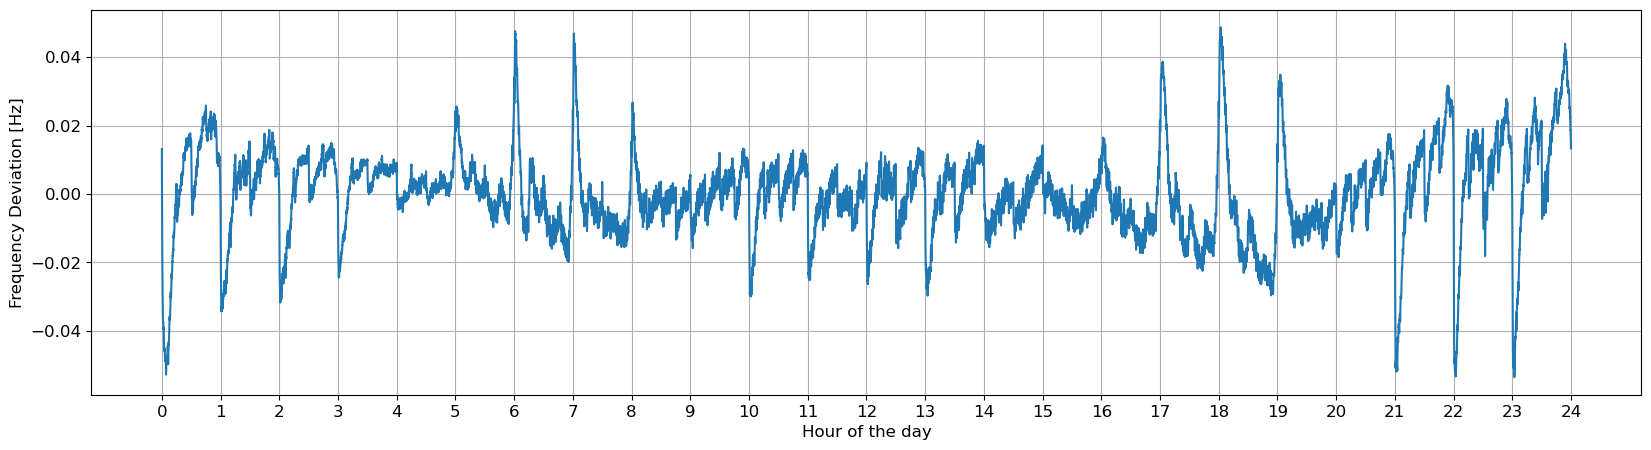

In [68]:
'''We plot the daily profile of the frequency usi: '''
plt.figure()
plt.rcParams.update({'font.size': 12})
df.groupby([df.index.time]).mean().plot(figsize=(20,5),grid=True, label = None, legend = False)
plt.xticks(np.arange(0, 25*3600, step=3600))
plt.xlabel('Time')
plt.ylabel('Frequency Deviation [Hz]')
plt.show()



'''An alternative, more complicated way shich might make the concept of the daily profile more clear is the following example: '''
daily_profile = []
for i in range(24*3600):
   daily_profile.append(df.iloc[i::(24*3600)].mean(axis=0)['Frequency'])
plt.figure(figsize = (20,5), label = 'Daily profile')
plt.xticks(np.arange(0, 25*3600, step=3600),labels=[str(i) for i in range(25)])
plt.grid()
plt.xlabel('Hour of the day')
plt.ylabel('Frequency Deviation [Hz]')
plt.plot(daily_profile)

#### For observing the connection to the dynamics of power generation and load, Figure 3 in  [Weissbach and Welfonder: High Frequency Deviations within the European Power System: Origins and Proposals for Improvement](https://ieeexplore.ieee.org/document/4840180) shows some interesting details.


#### (c) Calculate the Nadir, the integral, and the MSD of the frequency deviations for each hour of the dataset and plot the distributions in a histogram. Further, compute the mean of the indicators for each hour of the day (for example the time range 6 am - 7 am) and compare the results. <br>
 Hint: Use the method *pandas.DataFrame.groupby*.

Text(0, 0.5, 'Density')

<Figure size 640x480 with 0 Axes>

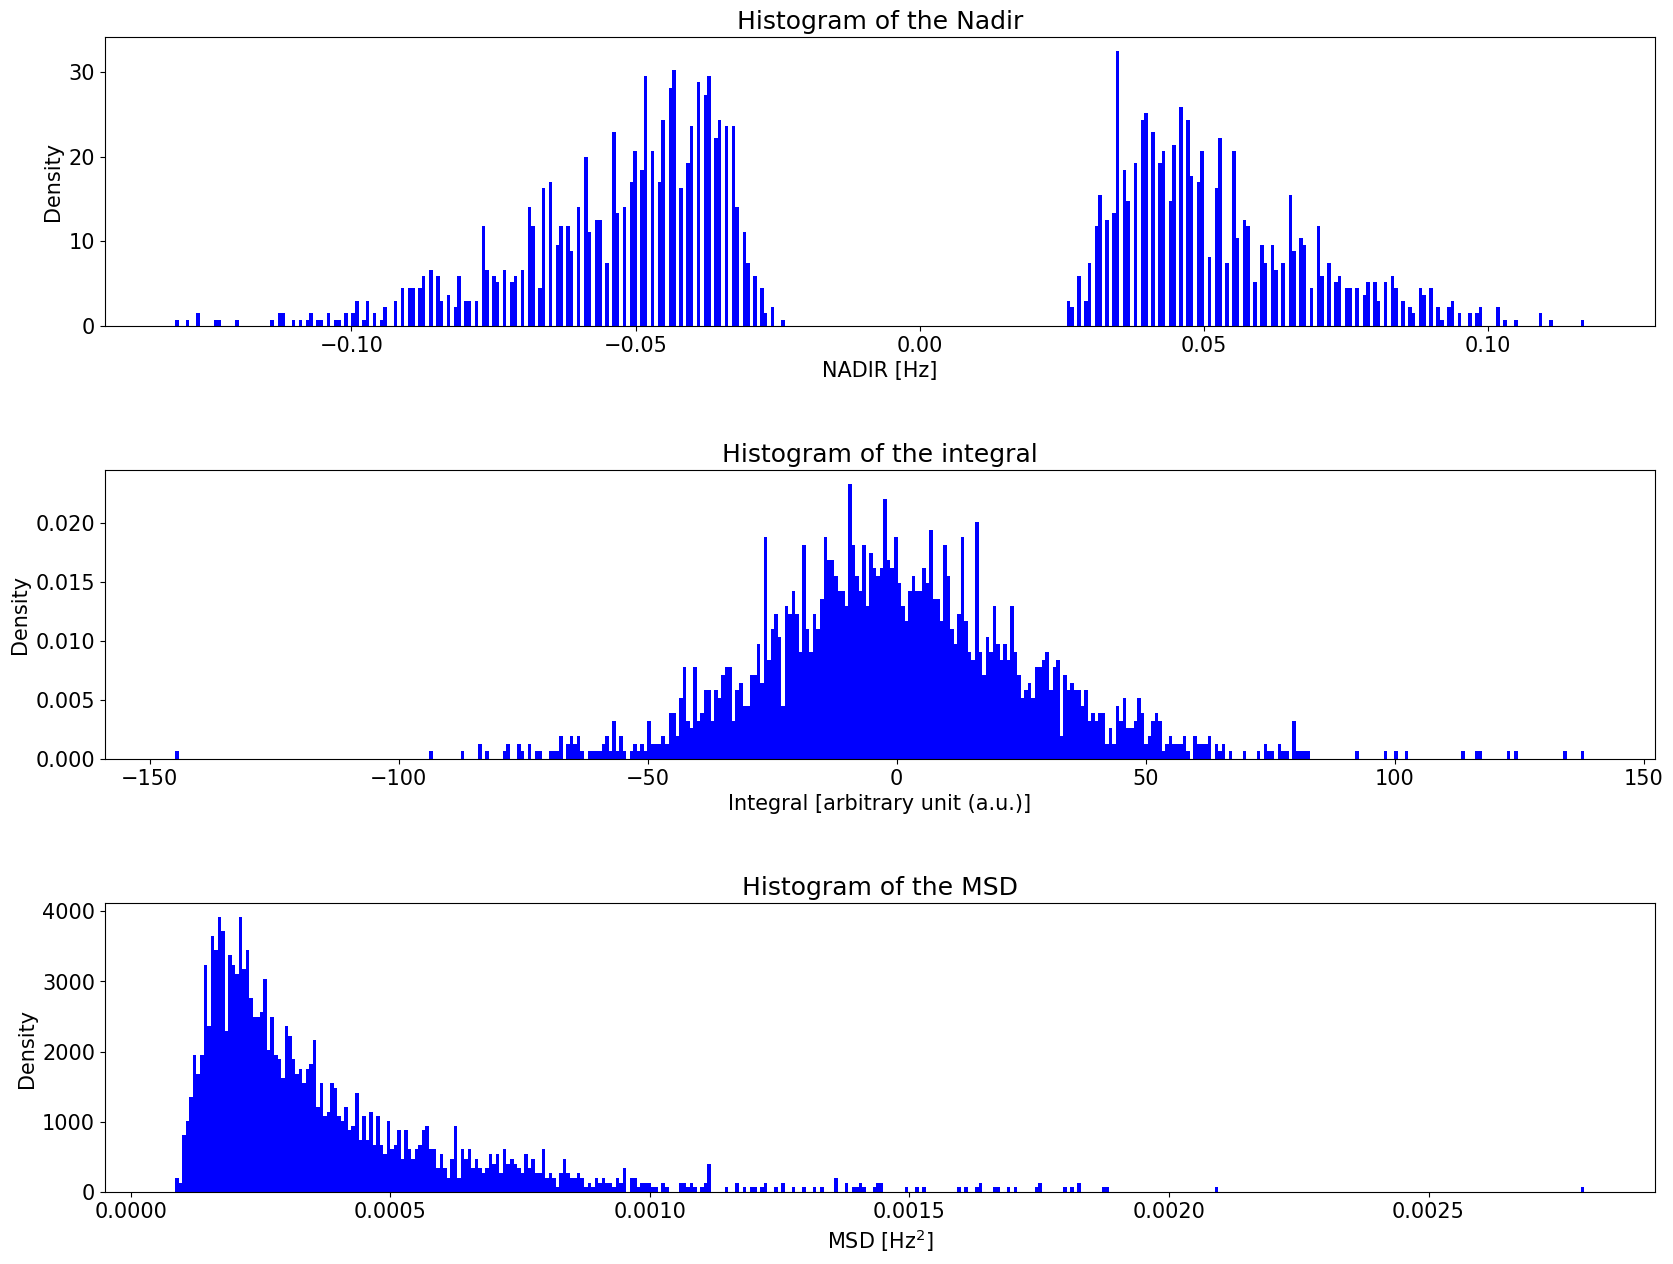

In [72]:
'''We calculate the NADIR, integral and MSD for each hour of the dataset:'''

NADIR = df.squeeze().groupby(pd.Grouper(freq='1h')).apply(lambda x: x[x.abs().idxmax()] ) #df.squeeze transforms a DataFrame to a Series, "apply" applies in the function in the brackets to the "groupby" method
'''Alternative method :
NADIR = df.loc[(df.abs().groupby(pd.Grouper(freq='1h'), dropna=True).idxmax().values).reshape(-1)]
'''

integral = df.groupby(pd.Grouper(freq='1h'), dropna=True).sum()
'''
Alternative method using resample from pandas: 
integral = df.resample('1h').sum()
'''

MSD = (df**2).groupby(pd.Grouper(freq='1h'), dropna=True).mean()
'''
Alternative method using resample from pandas: 
MSD = (df**2).resample('1h').sum()
'''
plt.figure()
fig,ax = plt.subplots(3,1,figsize=(20,15), gridspec_kw={'hspace': 0.5})
plt.rcParams.update({'font.size': 15})
ax[0].hist(NADIR.values, bins=400, color='blue', alpha=1, density=True)
ax[0].set_title('Histogram of the Nadir')
ax[0].set_xlabel('NADIR [Hz]')
ax[0].set_ylabel('Density')

ax[1].hist(integral.values, bins=400, color='blue', alpha=1, density=True)
ax[1].set_title('Histogram of the integral')
ax[1].set_xlabel('Integral [arbitrary unit (a.u.)]')
ax[1].set_ylabel('Density')


ax[2].hist(MSD.values, bins=400, color='blue', alpha=1, density=True)
ax[2].set_title('Histogram of the MSD')
ax[2].set_xlabel('MSD [Hz$^2$]')
ax[2].set_ylabel('Density')

Text(0.5, 1.0, 'Average values for each hour of the day for the MSD')

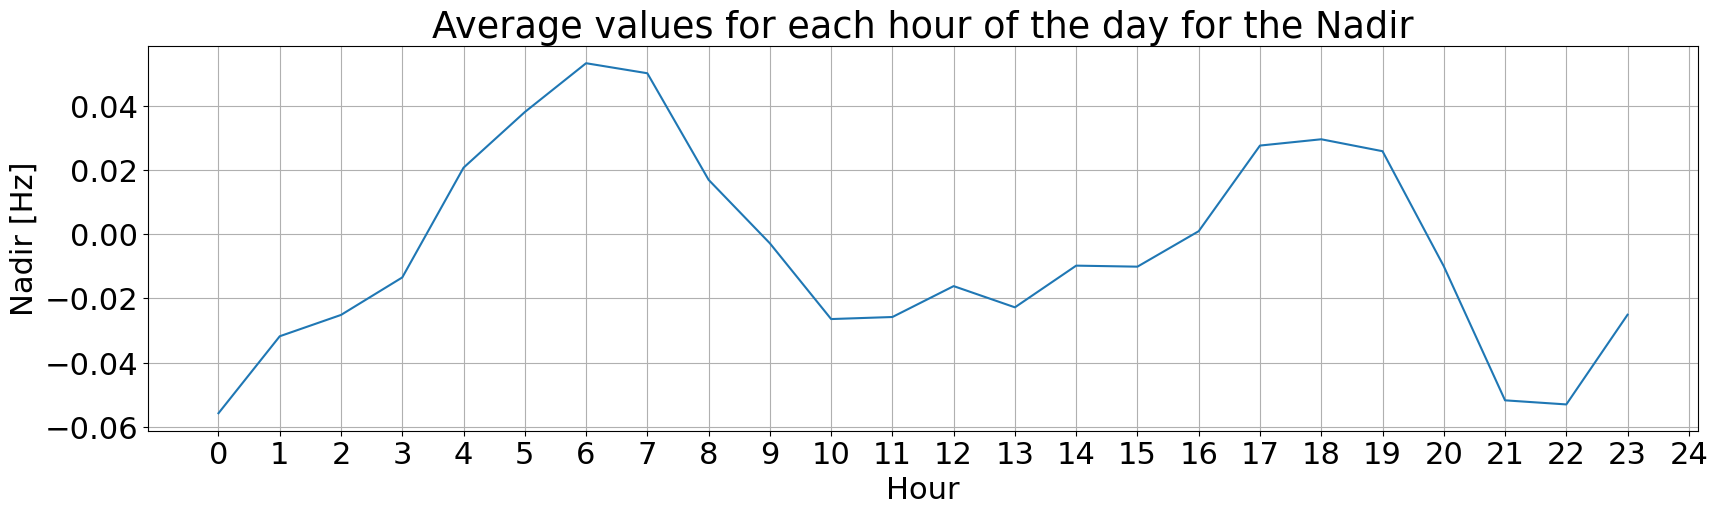

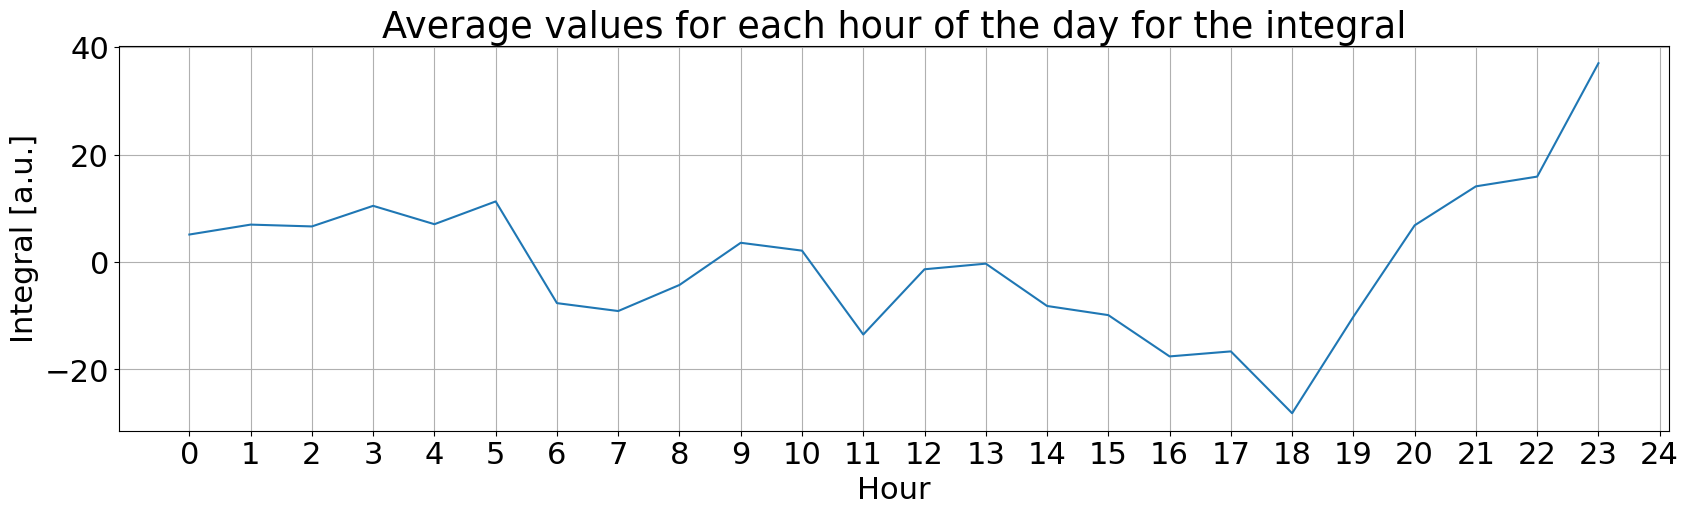

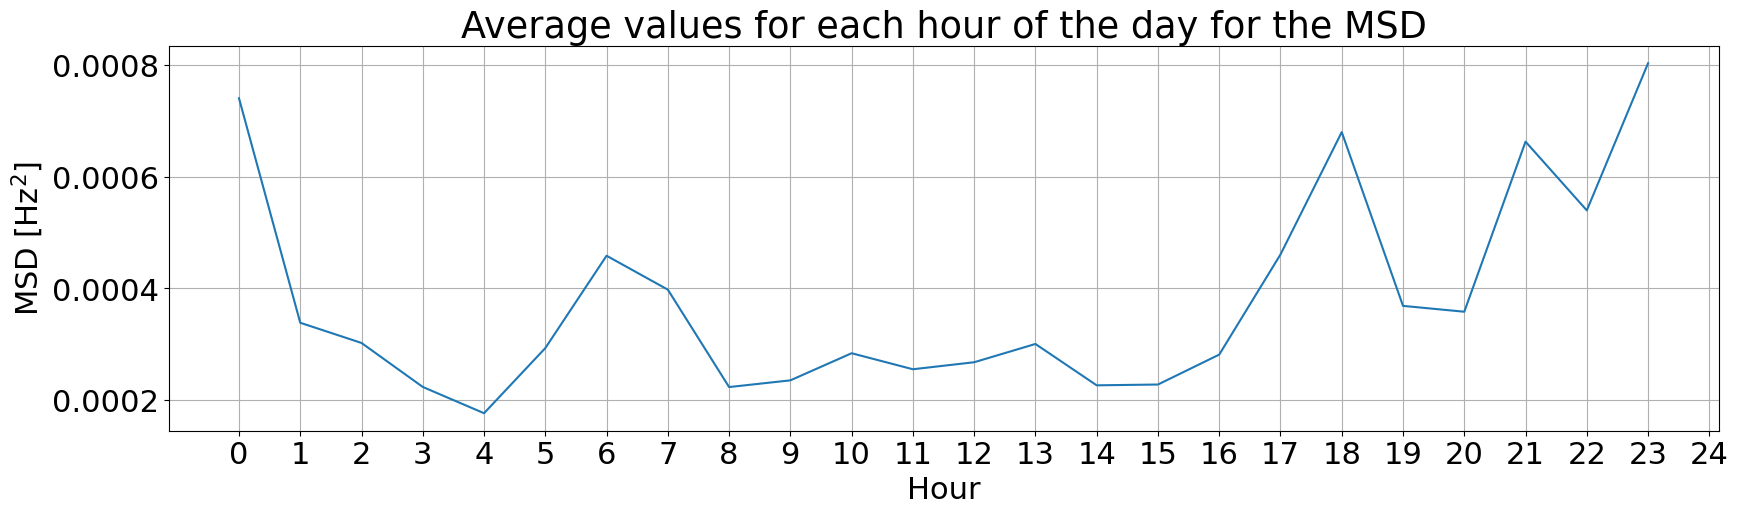

In [75]:
'''We calculate the mean of the Nadir, integral and MSD for each hour:'''
plt.figure()
plt.rcParams.update({'font.size': 22})

ax0 = NADIR.groupby(NADIR.index.hour).mean().plot(xlabel='Hour', ylabel='Nadir [Hz]', figsize = (20,5), xticks=np.arange(0, 25, step=1), grid=True, legend = False)
ax0.set_title('Average values for each hour of the day for the Nadir')

ax1 = integral.groupby(integral.index.hour).mean().plot(xlabel='Hour', ylabel='Integral [a.u.]', figsize = (20,5), xticks=np.arange(0, 25, step=1), grid=True, legend = False)
ax1.set_title('Average values for each hour of the day for the integral')

ax2 = MSD.groupby(MSD.index.hour).mean().plot(xlabel='Hour', ylabel='MSD [Hz$^2$]', figsize = (20,5), xticks=np.arange(0, 25, step=1), grid=True, legend = False)
ax2.set_title('Average values for each hour of the day for the MSD')

#### (d) Calculate analogously to (c) the RoCoF for all hours of the time series using $T=60\text{s}$, and plot the distribution in a histogram. Further, compute the mean of the RoCoF for each hour of the day (for example the time range 6 am - 7 am) and compare the results. <br> To flatten the signal, you can estimate the derivative $\frac{df}{dt}(t)$ using a low-pass filter on the frequency increments $\Delta f(t) = f(t)-f(t-\tau)$ with a rectangular rolling window of length $L=60\text{s}$, i.e. take for each time step the average of an interval of size $L$ around the time step. Compare your results using the original and the flattened derivative.

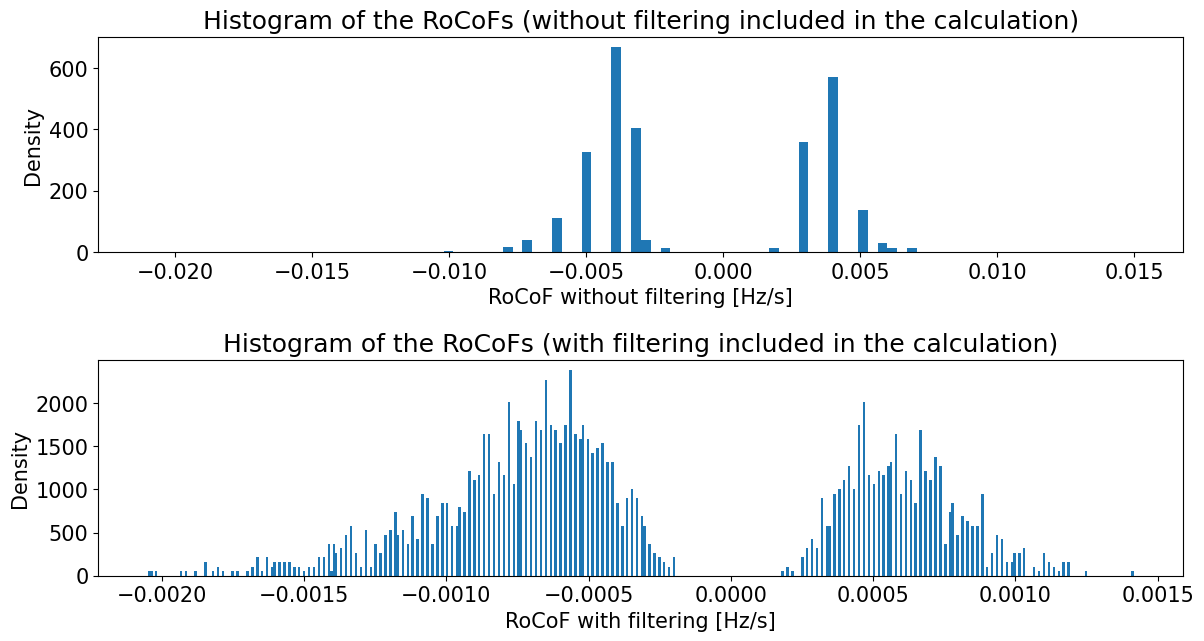

In [65]:
plt.rcParams.update({'font.size': 15})

'''We calculate the RoCoF without applying a filter on the frequency increments'''
full_hours = df.index[::3600]
full_hours = full_hours[1:-1]
lookup_window_size = 60
ROCOF_original = pd.Series(index = full_hours)
for i in np.arange(len(full_hours)):
    
    df_dt = df.iloc[i*3600:(i+2)*3600].diff()
    df_dt = df_dt.iloc[3600-60:3600+60] # Consider the increments in a time window around the beginning of an hour 
    if df_dt.squeeze().isnull().any(): # Check if there are missing values in the increment time series
        ROCOF_original.iloc[i]=np.nan
    else:
        ROCOF_original.iloc[i] = df_dt.loc[df_dt.squeeze().abs().idxmax()]
    ROCOF_original = pd.DataFrame(ROCOF_original)

'''We calculate the RoCoF applying a  rolling window filter on the frequency increments'''
full_hours = df.index[::3600]
full_hours = full_hours[1:-1]
lookup_window_size = 60
ROCOF = pd.Series(index = full_hours)
for i in np.arange(len(full_hours)):
    
    df_dt = df.iloc[i*3600:(i+2)*3600].diff().rolling(60 , center=True).mean() # For every data point calculate take the mean value over a time window around the data point
    df_dt = df_dt.iloc[3600-60:3600+60]  # Consider the increments in a time window around the beginning of an hour 
    if df_dt.squeeze().isnull().any(): # Check if there are missing values in the increment time series
        ROCOF.iloc[i]=np.nan 
    else:
        ROCOF.iloc[i] = df_dt.loc[df_dt.squeeze().abs().idxmax()] # Apply the actual definition of the ROCOF
    ROCOF = pd.DataFrame(ROCOF)


fig,ax = plt.subplots(2,1,figsize=(14,7), gridspec_kw={'hspace': 0.5, 'wspace': 0.9})
ax[0].hist(ROCOF_original, bins=100, density=True)
ax[0].set_xlabel('RoCoF without filtering [Hz/s]')
ax[0].set_ylabel('Density')
ax[0].set_title('Histogram of the RoCoFs (without filtering included in the calculation)')

ax[1].hist(ROCOF, bins=400, density=True)
ax[1].set_title('Histogram of the RoCoFs (with filtering included in the calculation)')
ax[1].set_xlabel('RoCoF with filtering [Hz/s]')
ax[1].set_ylabel('Density')
plt.show()

#### Now we calculate the mean of the ROCOF for each hour, using both methods described above:

<Figure size 640x480 with 0 Axes>

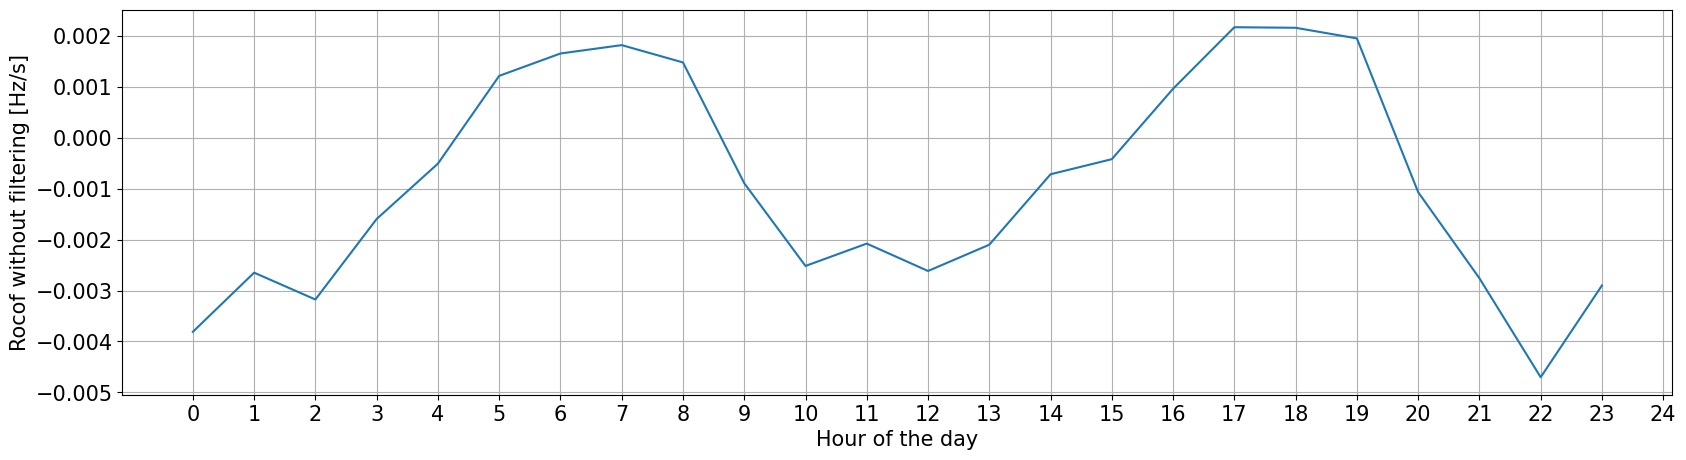

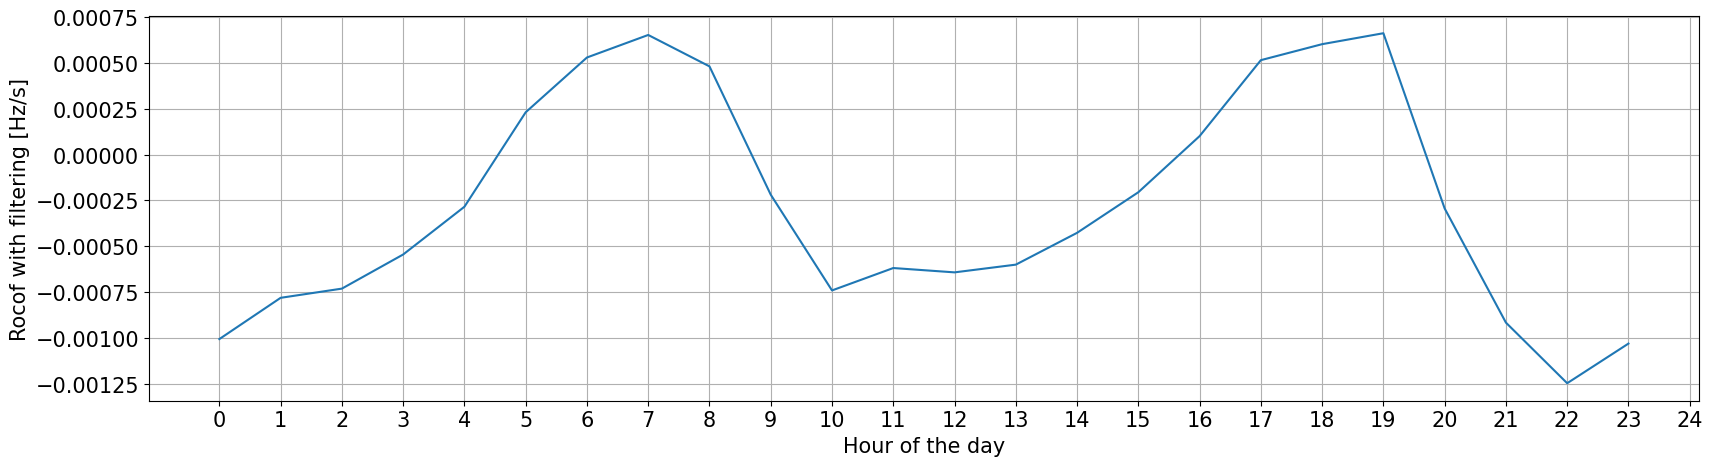

In [61]:
plt.figure()
ax0 = ROCOF_original.groupby(ROCOF_original.index.hour).mean().plot(xlabel='Hour of the day', ylabel='Rocof without filtering [Hz/s]',xticks=np.arange(0, 25, step=1), grid=True, figsize = (20,5), legend = False)
ax1 = ROCOF.groupby(ROCOF.index.hour).mean().plot(xlabel='Hour of the day', ylabel='Rocof with filtering [Hz/s]',xticks=np.arange(0, 25, step=1), figsize = (20,5), grid=True, legend = False) 